<a href="https://colab.research.google.com/github/Kumchu-Elsen/Bagging-and-Random-Forest-Project---Visa-Application/blob/main/EasyVisa_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

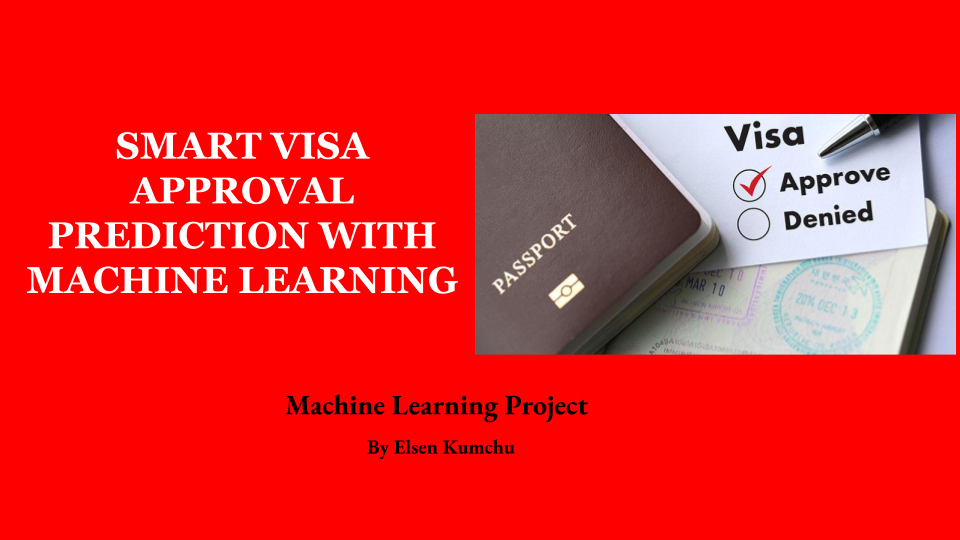

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/AI and ML Post Graduate Program/Course 3 Advance Machine Learning Project/EasyVisa.csv"
visa=pd.read_csv(file_path)

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape

NameError: name 'data' is not defined

#### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Fixing the negative values in number of employees columns

In [ ]:
data["no_of_employees"] = data["no_of_employees"].abs()

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [ ]:
data["case_id"].nunique()

25480

In [ ]:
data.drop(["case_id"], axis=1, inplace=True)

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

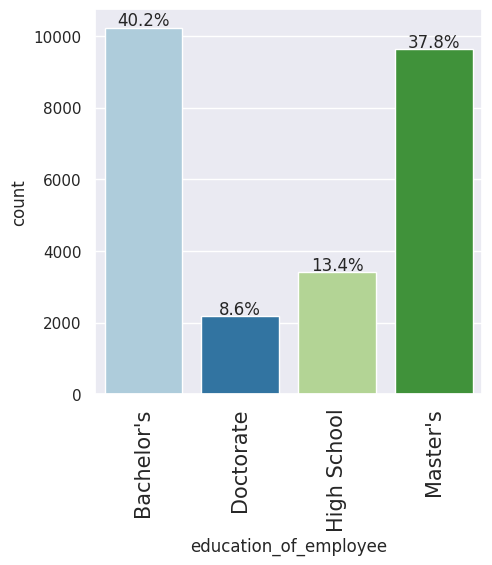

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

#### Observations on region of employment

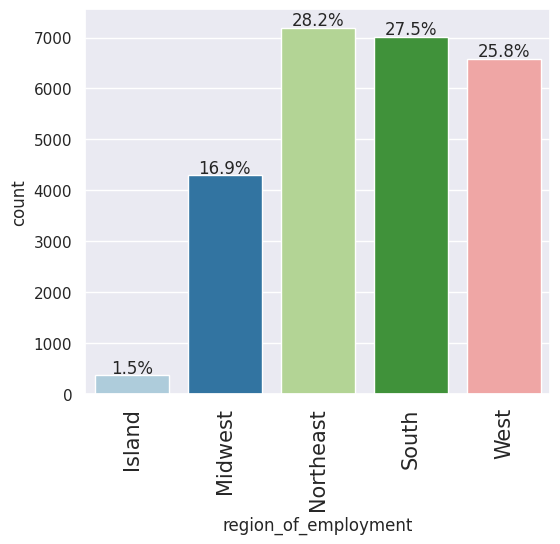

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

#### Observations on job experience

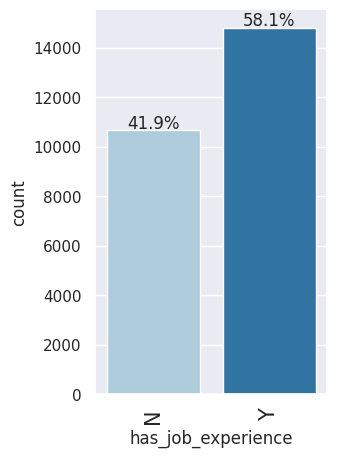

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

#### Observations on case status

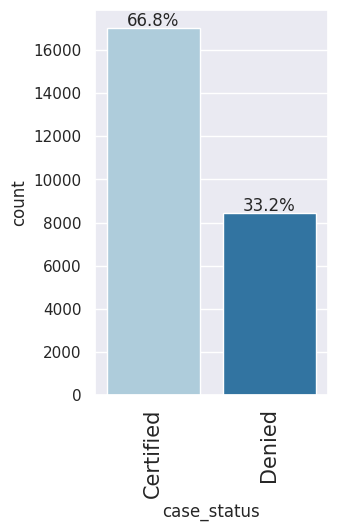

In [ ]:
labeled_barplot(data, "case_status", perc=True)

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

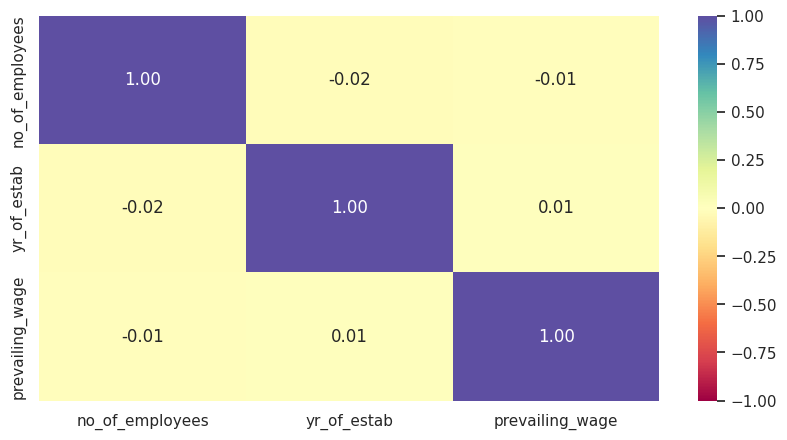

In [ ]:
##correlation between the variables

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


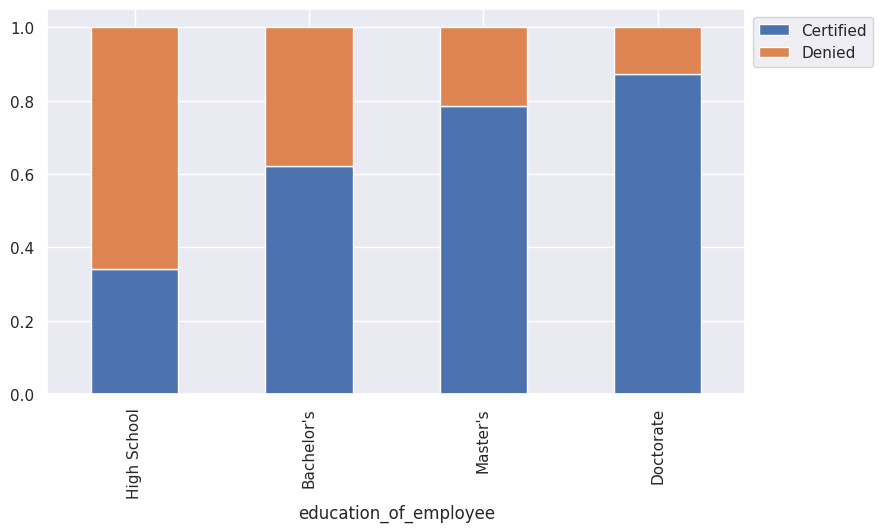

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


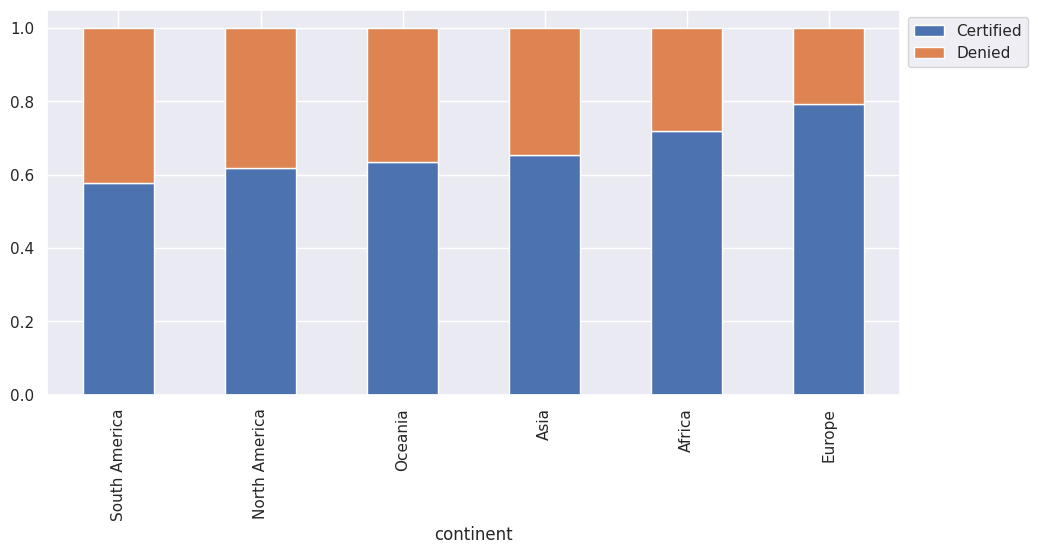

In [ ]:
stacked_barplot(data, "continent", "case_status")

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


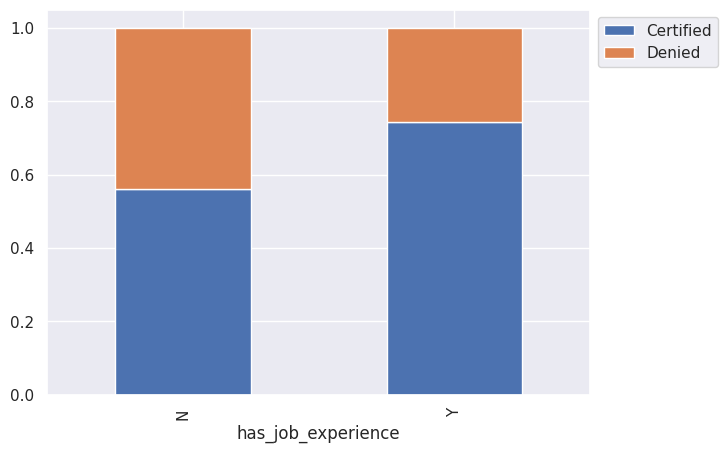

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

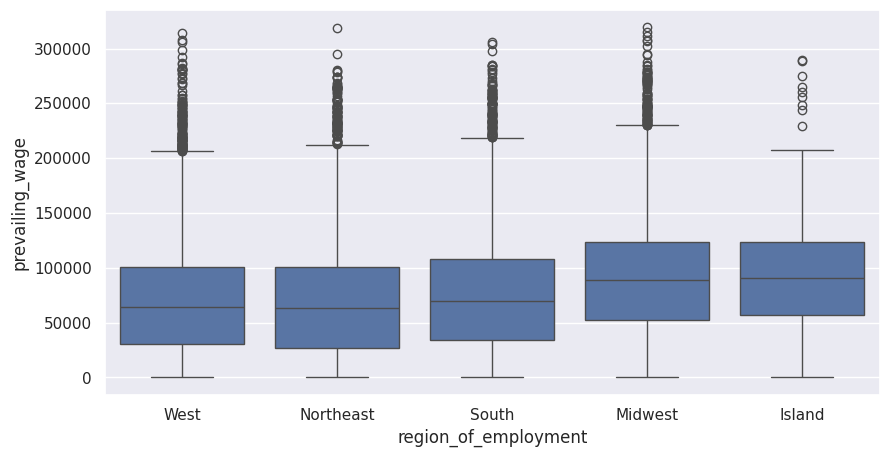

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data)
plt.show()

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

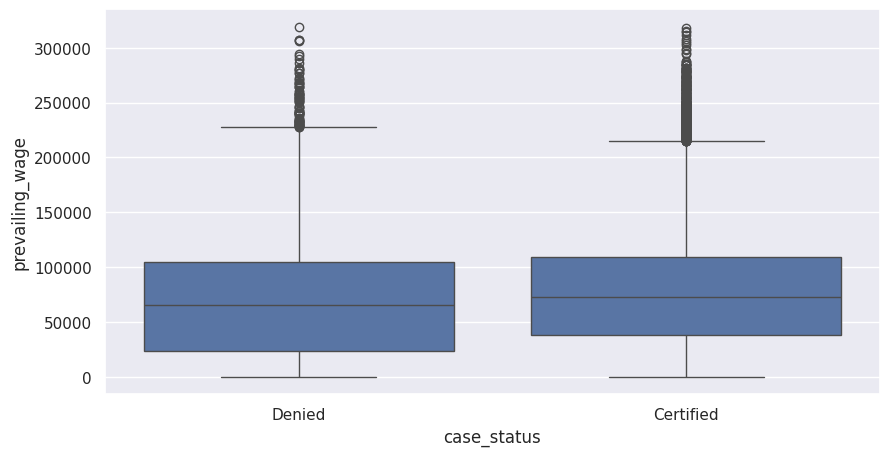

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='case_status', y='prevailing_wage', data=data)
plt.show()

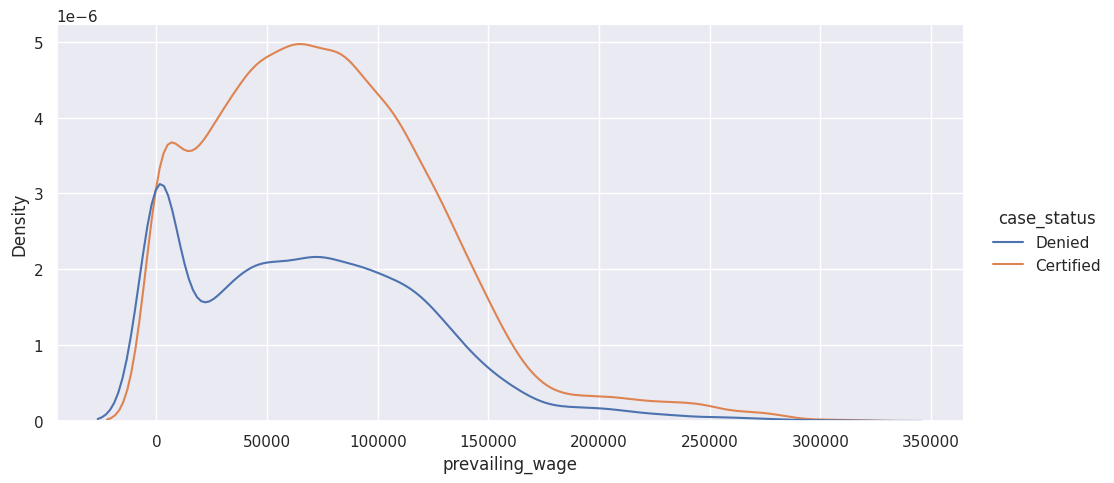

In [ ]:
sns.displot(data=data, x='prevailing_wage', hue='case_status', kind='kde', height=5, aspect=2)
plt.show()

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


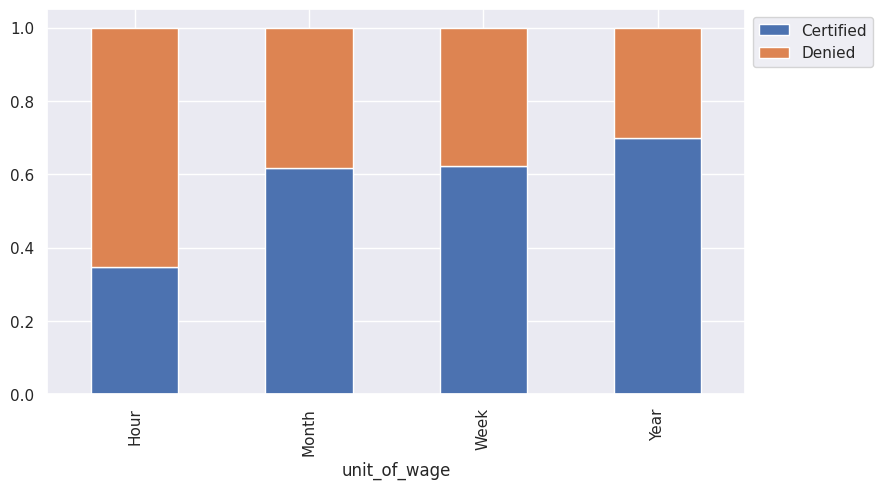

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

## Data Pre-processing

### Outlier Check

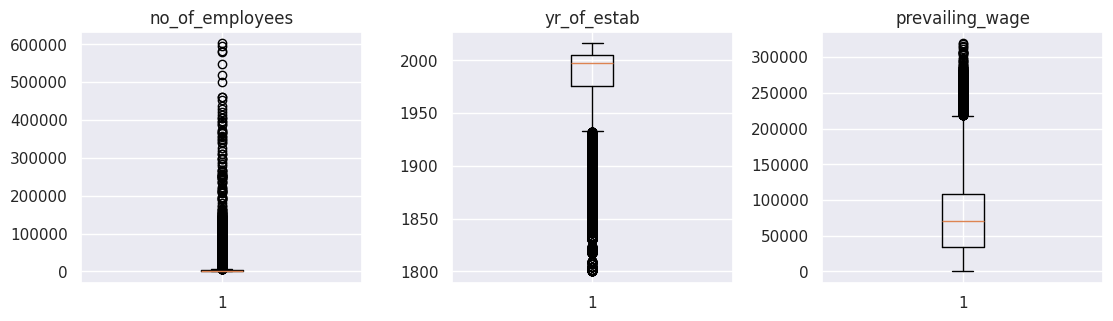

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"],axis=1) ## This is to drop case status from the data
y = data["case_status"]


X = pd.get_dummies(X,drop_first=True) ## This is to create dummies for X

# Split the dataset into train and validation sets with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Split the validation set into valid and test sets with a ratio of 9:1
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.1, random_state=1, stratify=y_val
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of Validation set :  (6879, 21)
Shape of test set :  (765, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

In [ ]:
scorer = metrics.make_scorer(metrics.precision_score)

### Model building with original data


Cross-Validation performance on training dataset:

Bagging: 0.6997639326574598
Random forest: 0.725723009288019
GBM: 0.7494953899433866
Adaboost: 0.7389560472725718
Xgboost: 0.731386204789127
dtree: 0.655191092253948

Validation Performance:

Bagging: 0.6910888210495711
Random forest: 0.7184183747637738
GBM: 0.7428405291466783
Adaboost: 0.7336822212530891
Xgboost: 0.7287396423898822
dtree: 0.6659398168338422


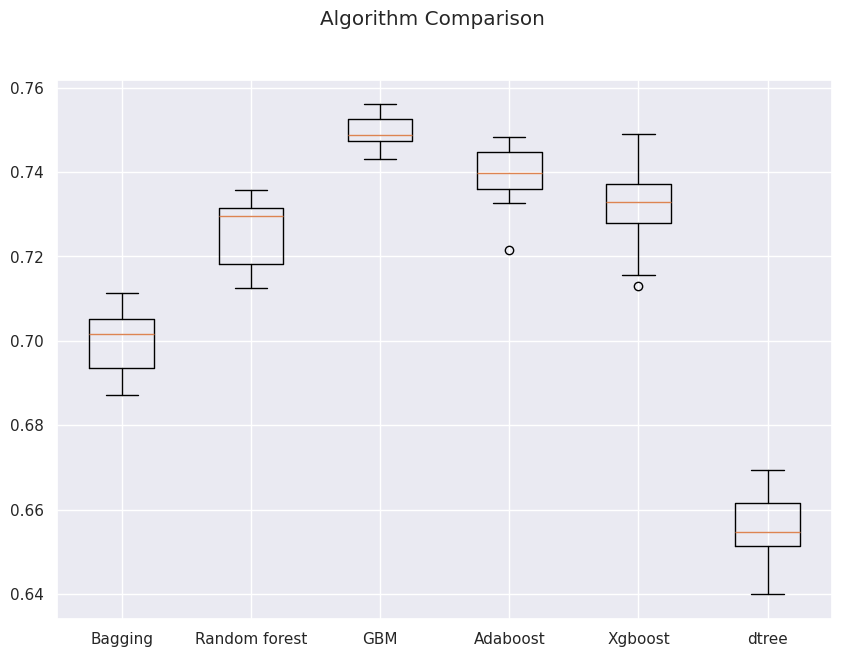

In [ ]:
# Empty list to store all the models
models = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))  # Random Forest Classifier
models.append(("GBM", GradientBoostingClassifier(random_state=1)))  # Gradient Boosting Classifier
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))  # AdaBoost Classifier
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))  # Decision Tree Classifier

# Empty list to store all model's CV scores
results1 = []
# Empty list to store name of the models
names = []

# loop through all models to get the mean cross-validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1  # Set number of splits to 10
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring='accuracy', cv=kfold  # Use accuracy as the metric
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)  # Fit the model on X_train and y_train
    scores = accuracy_score(y_val, model.predict(X_val))  # Use accuracy score as the metric
    print("{}: {}".format(name, scores))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,) 


Cross-Validation performance on training dataset:

Bagging: 0.7629480510740613
Random forest: 0.7888021893111471
GBM: 0.7938812495309449
Adaboost: 0.7822969022459324
Xgboost: 0.790690864798339
dtree: 0.7286576692658923

Validation Performance:

Bagging: 0.6854193923535398
Random forest: 0.7187091146969036
GBM: 0.7371711004506469
Adaboost: 0.7300479720889664
Xgboost: 0.726122982991714
dtree: 0.6576537287396423


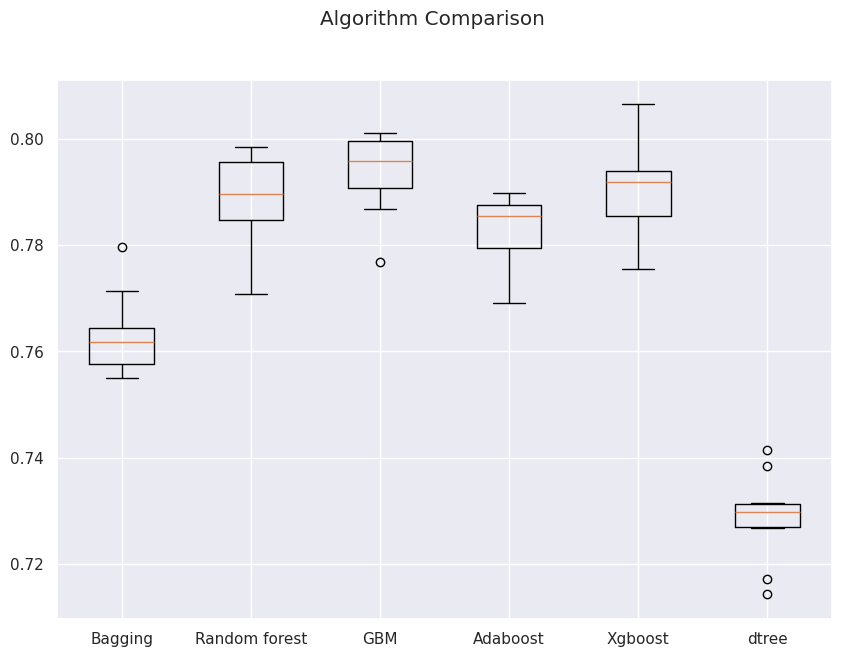

In [ ]:
# Print counts before OverSampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)  # Set k_neighbors to 5 and sampling_strategy to 'auto'
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Print counts after OverSampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

# Empty list to store all the models
models = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))  # Random Forest Classifier
models.append(("GBM", GradientBoostingClassifier(random_state=1)))  # Gradient Boosting Classifier
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))  # AdaBoost Classifier
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))  # Decision Tree Classifier

# Empty list to store all model's CV scores
results1 = []
# Empty list to store name of the models
names = []

# loop through all models to get the mean cross-validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1  # Set number of splits to 10
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring='accuracy', cv=kfold  # Use accuracy as the metric
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)  # Fit the model on oversampled data
    scores = accuracy_score(y_val, model.predict(X_val))  # Use accuracy score as the metric
    print("{}: {}".format(name, scores))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with undersampled data

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 


Cross-Validation performance on training dataset:

Bagging: 0.6673970093511233
Random forest: 0.6900221661534953
GBM: 0.7098607309841487
Adaboost: 0.6929778908655491
Xgboost: 0.6916258980499488
dtree: 0.6197016478503821

Validation Performance:

Bagging: 0.639482482919029
Random forest: 0.6758249745602558
GBM: 0.7025730484081989
Adaboost: 0.6983573193778165
Xgboost: 0.6823666230556767
dtree: 0.6162232882686437


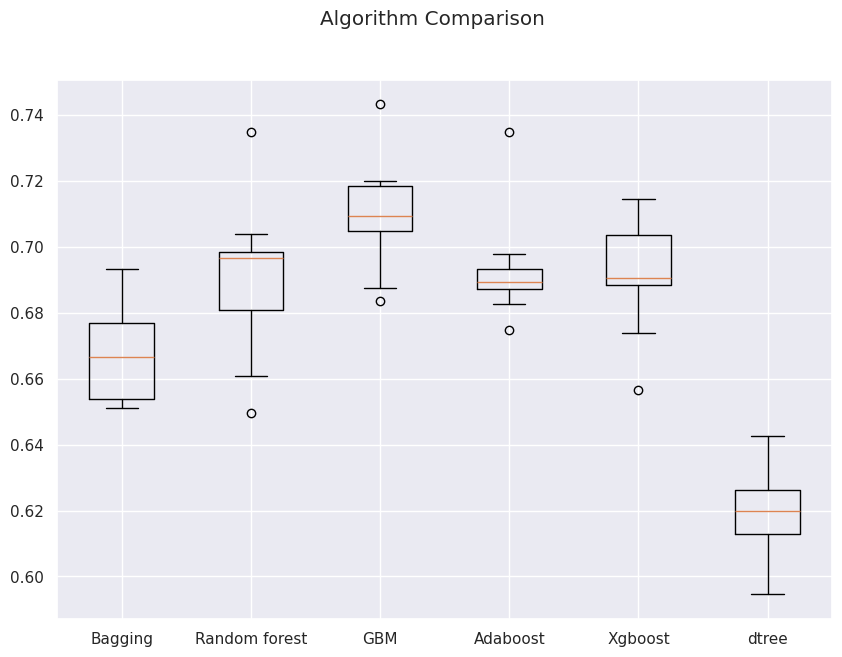

In [ ]:
# Under-sampling
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)  # Undersample to balance classes
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Print counts before UnderSampling
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Print counts after UnderSampling
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

# Print shapes after UnderSampling
print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

# Empty list to store all the models
models = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))  # Random Forest Classifier
models.append(("GBM", GradientBoostingClassifier(random_state=1)))  # Gradient Boosting Classifier
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))  # AdaBoost Classifier
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))  # Decision Tree Classifier

# Empty list to store all model's CV scores
results1 = []
# Empty list to store name of the models
names = []

# loop through all models to get the mean cross-validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1  # Set number of splits to 10
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring='accuracy', cv=kfold  # Use accuracy as the metric
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)  # Fit the model on undersampled data
    scores = accuracy_score(y_val, model.predict(X_val))  # Use accuracy score as the metric
    print("{}: {}".format(name, scores))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 100, 150, 200],  # Set the number of estimators
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Set the learning rate
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                  DecisionTreeClassifier(max_depth=2, random_state=1),
                  DecisionTreeClassifier(max_depth=3, random_state=1)]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs=1, scoring='accuracy', cv=5, random_state=1)  # Set cv to 5 for 5-fold cross-validation

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)  # Fit the model on oversampled data

print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7726478699462219
CPU times: user 17min 35s, sys: 1.41 s, total: 17min 36s
Wall time: 17min 48s


In [ ]:
# Complete the code to set the best parameters.
tuned_ada = AdaBoostClassifier(
    n_estimators=randomized_cv.best_params_['n_estimators'],  # Use the best n_estimators from RandomizedSearchCV
    learning_rate=randomized_cv.best_params_['learning_rate'],  # Use the best learning_rate from RandomizedSearchCV
    estimator=DecisionTreeClassifier(max_depth=randomized_cv.best_params_['estimator'].max_depth, random_state=1)  # Use the best estimator found
)

tuned_ada.fit(X_train_over, y_train_over)  # Fit the tuned model on oversampled data


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
# Assuming `model_performance_classification_sklearn` is a function defined to compute performance metrics
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)  # Model performance on training data
ada_train_perf  # Print the performance metrics


,Accuracy,Recall,Precision,F1
0,0.793839,0.839419,0.76929,0.802826


In [ ]:
# Complete the code to check the model performance for validation data.
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)  # Model performance on validation data
ada_val_perf  # Print the performance metrics


,Accuracy,Recall,Precision,F1
0,0.734118,0.835002,0.78174,0.807494


In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyperparameters.
param_grid = {
    "n_estimators": np.arange(50, 200, 50),  # Define n_estimators range (50, 100, 150)
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Define learning rates
    "subsample": [0.7, 0.8, 0.9, 1.0],  # Define subsample values
    "max_features": ['sqrt', 'log2', None]  # Define max_features options
}

## Complete the code to set the cv parameter.
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring='accuracy', n_iter=50, cv=5, random_state=1)  # Set cv to 5 for 5-fold cross-validation

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))


## Complete the code to define the best model.
tuned_gbm = GradientBoostingClassifier(
    max_features=randomized_cv.best_params_['max_features'],  # Use the best max_features from RandomizedSearchCV
    random_state=1,  # Random state for reproducibility
    learning_rate=randomized_cv.best_params_['learning_rate'],  # Use the best learning_rate from RandomizedSearchCV
    n_estimators=randomized_cv.best_params_['n_estimators'],  # Use the best n_estimators from RandomizedSearchCV
    subsample=randomized_cv.best_params_['subsample']  # Use the best subsample from RandomizedSearchCV
)

tuned_gbm.fit(X_train_over, y_train_over)  # Fit the tuned model on oversampled data

gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf


## Complete the code to print the model performance on the validation data.
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)  # Model performance on validation data
gbm_val_perf


Best parameters are {'subsample': 1.0, 'n_estimators': np.int64(150), 'max_features': 'sqrt', 'learning_rate': 0.2} with CV score=0.7776006330253777
CPU times: user 8min 40s, sys: 711 ms, total: 8min 41s
Wall time: 8min 45s


,Accuracy,Recall,Precision,F1
0,0.738334,0.852852,0.777073,0.8132


In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Define the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Range for n_estimators
    'scale_pos_weight': [1, 2, 3],  # Set scale_pos_weight to adjust for imbalanced classes
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Set learning rates
    'gamma': [0, 0.1, 0.5, 1],  # Set gamma values to control the complexity of trees
    'subsample': [0.7, 0.8, 0.9, 1.0]  # Set subsample values
}

# Set the cross-validation parameter
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'learning_rate': 0.05, 'gamma': 0} with CV score=0.7803707355221204
CPU times: user 5min 6s, sys: 1.76 s, total: 5min 7s
Wall time: 3min 20s


In [ ]:
# Define the best model
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric='logloss',  # Using logloss as the evaluation metric
    subsample=randomized_cv.best_params_['subsample'],  # Best subsample from RandomizedSearchCV
    scale_pos_weight=randomized_cv.best_params_['scale_pos_weight'],  # Best scale_pos_weight from RandomizedSearchCV
    n_estimators=randomized_cv.best_params_['n_estimators'],  # Best n_estimators from RandomizedSearchCV
    learning_rate=randomized_cv.best_params_['learning_rate'],  # Best learning_rate from RandomizedSearchCV
    gamma=randomized_cv.best_params_['gamma']  # Best gamma from RandomizedSearchCV
)

xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
print(xgb2_train_perf)

   Accuracy    Recall  Precision        F1
0  0.818811  0.881222   0.783433  0.829455


In [ ]:
# Print the model performance on the validation data
xgb2_val_perf = model_performance_classification_sklearn(xgb2, X_val, y_val)  # Using validation set
print(xgb2_val_perf)

   Accuracy   Recall  Precision        F1
0  0.740515  0.85764   0.776967  0.815313


## Model Performances

In [ ]:
# Assuming rf2 is already trained and defined, for example:
rf2 = RandomForestClassifier(random_state=1)
rf2.fit(X_train_over, y_train_over)

# Compute validation performance for Random Forest (rf2)
rf2_val_perf = model_performance_classification_sklearn(rf2, X_val, y_val)  # Replace with your performance function


In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        xgb2_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
print(models_train_comp_df)

NameError: name 'rf2_train_perf' is not defined

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        xgb2_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
print(models_val_comp_df)

NameError: name 'rf2_val_perf' is not defined

In [ ]:
# code to print the model performance on the test data by the best model.
best_model = tuned_gbm  # Assuming `tuned_gbm` is the best model, change if another model is the best
test = model_performance_classification_sklearn(best_model, X_test, y_test)
print("Test performance comparison:")
print(test)

In [ ]:
# Feature importances for the best model

importances = best_model.feature_importances_  # Get feature importances from the best model
indices = np.argsort(importances)

# Plotting feature importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___